# Model testing with quadratic, absolute, and other reward functions on Env-v0 

In [2]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp

import gym_gyroscope_env
import spinup
import torch
from functools import partial
import pandas as pd

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control
from custom_functions.custom_functions import read_progress

import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

## Plot rewards

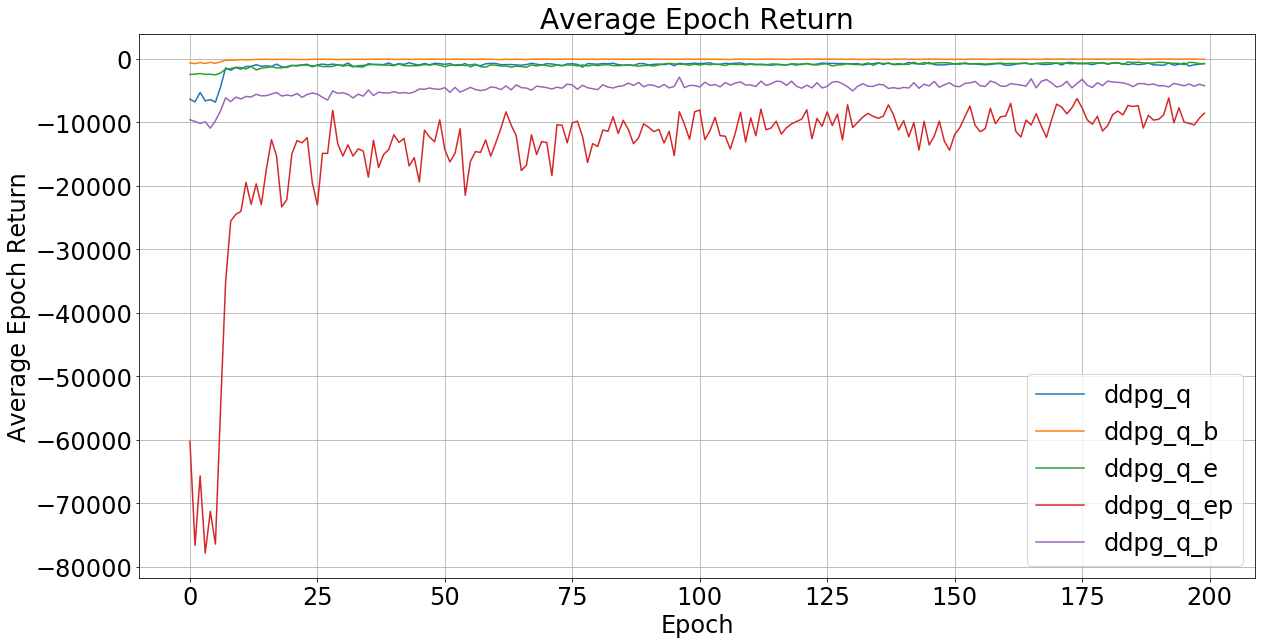

In [2]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['ddpg_a','ddpg_n','ddpg_q']
agent_paths = ['ddpg_q','ddpg_q_b','ddpg_q_e','ddpg_q_ep','ddpg_q_p']

for agent_path in agent_paths:
    progress = read_progress(agent_path)
    plt.plot(np.arange(progress.shape[0]), progress[:,1])
    # plt.fill_between(np.arange(progress.shape[0]), progress[:,3], progress[:,4], facecolor=color, alpha=0.5)
    
# plt.ylim([-10000,0])
plt.legend(agent_paths,fontsize=24)

## Test an agent

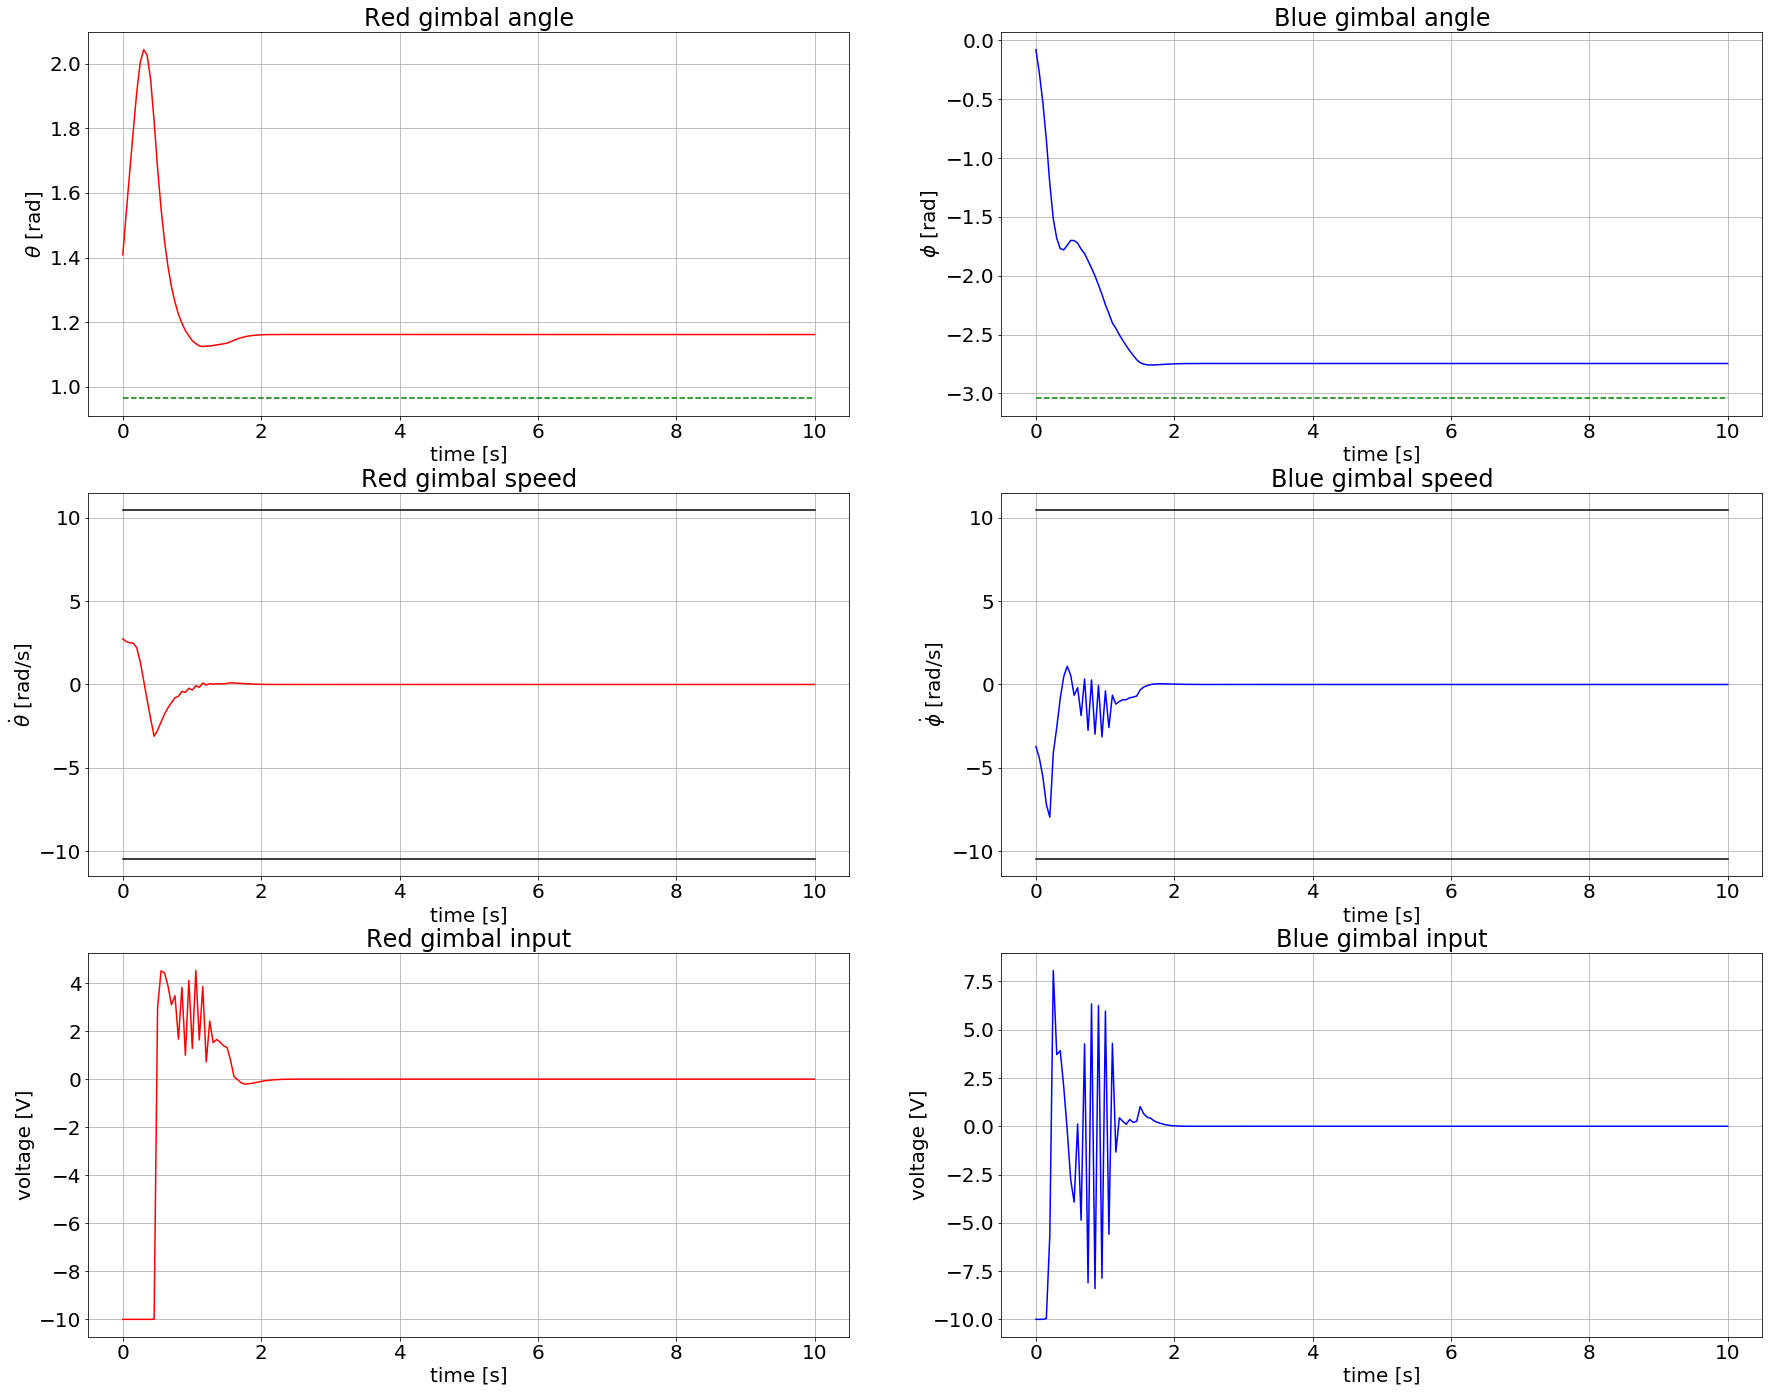

In [3]:
# Test paramaters
env_name = 'GyroscopeEnv-v0'

# init_state = [1.3,0,0,0,-0.8,0.9,20]
env = create_env(env_name,state=None)

agent_paths = ['ddpg_a','ddpg_n','ddpg_n_b','ddpg_q','ddpg_q_b','ddpg_q_e','ddpg_q_ep','ddpg_q_p','ddpg_s']
agent = load_agent(agent_paths[-2])
t_end = 10

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 3)

## Evaluate control performance

In [5]:
metrics_QAN = pd.read_csv('Metrics_QAN.csv')
metrics_QAN

,Unnamed: 0,ddpg_q,ddpg_q_b,ddpg_q_e,ddpg_q_ep,ddpg_q_p,ddpg_a,ddpg_n,ddpg_n_b,ddpg_s
0,$\theta$ MAE (rad),0.4238,0.4001,0.2592,0.4484,0.4136,0.3384,0.5695,0.6205,1.2263
1,$\phi$ MAE (rad),0.3731,0.3518,0.1938,0.4254,0.3940,0.4103,0.4399,0.4131,1.2053
2,$\theta$ MSSE (rad),0.3670,0.3508,0.1804,0.3667,0.3511,0.2756,0.4408,0.5209,0.8580
3,$\phi$ MSSE (rad),0.3232,0.3028,0.1166,0.3905,0.3360,0.3442,0.3511,0.3377,1.0471
4,$\theta$ in bounds (%),36.1700,35.2000,71.3500,28.4900,38.9500,48.8600,37.4700,38.7300,2.2800
5,$\phi$ in bounds (%),35.1500,35.7000,74.8000,23.7800,34.9200,37.2900,47.2700,53.3500,1.0800
6,$\theta$ unsteady (%),17.0100,14.0400,8.3300,29.6900,13.7100,9.8800,4.4600,2.4300,87.0800
7,$\phi$ unsteady (%),30.0500,25.6000,16.8200,36.8700,29.0800,18.5700,5.2900,3.3800,92.5500
8,$\theta$ rise time (s),0.6158,0.6613,0.5474,0.6288,0.5932,0.6187,1.2022,1.1136,0.6914
9,$\phi$ rise time (s),0.3974,0.3952,0.3551,0.4038,0.4558,0.3911,1.0269,0.7993,0.3732
